# Polynomial Interpolation – Exercise sheet 2

TMA4130/TMA4135 Høst 2023

##,Lagrange,interpolation

Remember,how,we,can,implement the cardinal functions and do the Lagrange interpolation:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import random

In [24]:
# THIS FUNCTION HAS TO BE COMPLETED CREATING THE CARDINAL FUNCTIONS
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = 1
        for j in range(n):      # Loop to make the product for l_i
            if i != j:
                li *= (x - xdata[j])/(xdata[i] - xdata[j])
        l.append(li)            # Append the array to the list            
    return l



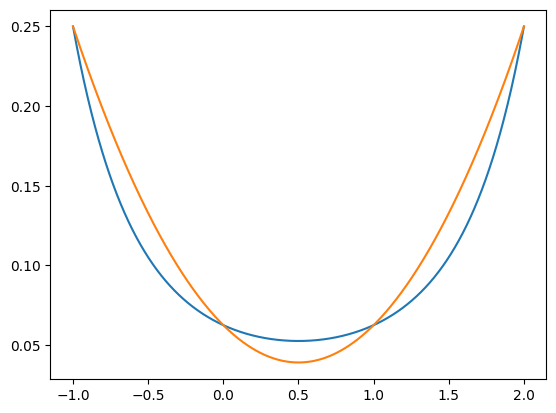

In [69]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

def f(x):
    return 2 ** (x ** 2 - 4 - x)

def p(x):
    cardinals = cardinal([-1, 0, 1, 2], x)
    return lagrange([f(-1), f(0), f(1), f(2)], cardinals)

x = np.linspace(-1, 2, 1234)

plt.plot(x,f(x))
plt.plot(x,p(x))
plt.show()


Error: 0.04180941749497033


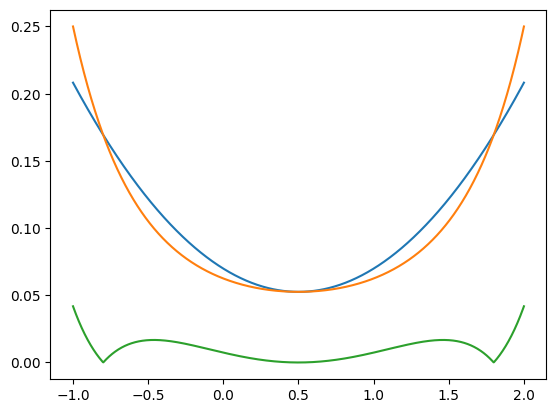

In [96]:
# e)
def p2(x):
    x2 = 1/2-3*3**(1/2)/4
    x1 = 1/2
    x0 = 1/2+3*3**(1/2)/4
    cardinals = cardinal([x0, x1, x2], x)
    return lagrange([f(x0), f(x1), f(x2)], cardinals)

plt.plot(x,p2(x))
plt.plot(x,f(x))
plt.plot(x,abs(p2(x)-f(x)))

maximum_error = max(abs(p2(-1)-f(-1)),abs(p2(2)-f(2)))
print("Error:",maximum_error)


Error: 66419269.326995686


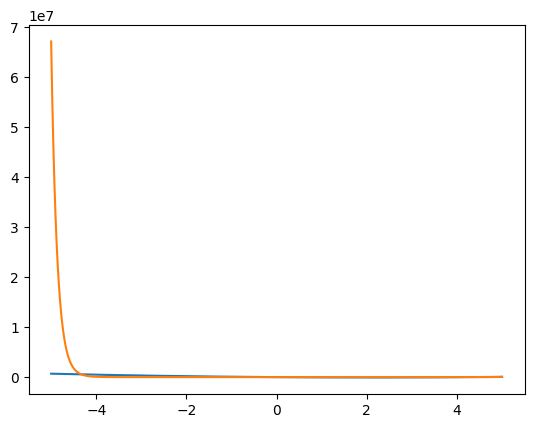

In [95]:
def p3(x):
    x0 = 5*(3**(1/2))/2
    x1 = 0
    x2 = -x0
    cardinals = cardinal([x0, x1, x2], x)
    return lagrange([f(x0), f(x1), f(x2)], cardinals)
x2 = np.linspace(-5,5,1234)
plt.plot(x2,p3(x2))
plt.plot(x2,f(x2))
maximum_error = abs(p3(-5)-f(-5))
print("Error:",maximum_error)

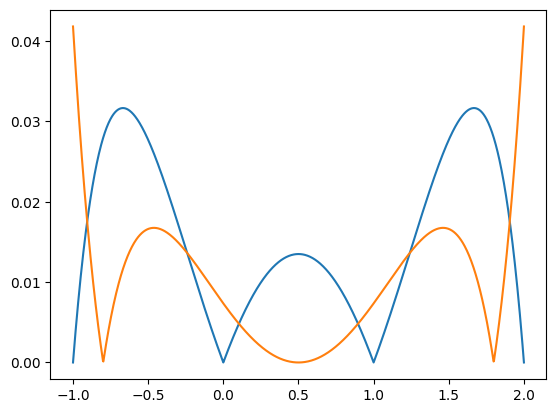

In [98]:
# 2f a refers to c and c refers to e??
plt.plot(x,abs(f(x)-p(x)))
plt.plot(x,abs(p2(x)-f(x)))

### a) Interpolating $x(t)$

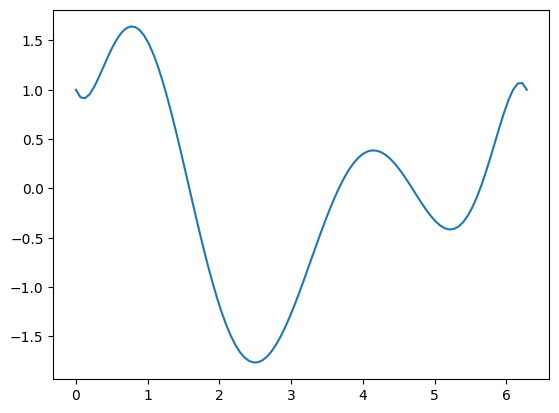

In [104]:
# Interpolation data
tdata = [0,0.8976,1.7952,2.6928,3.5904,4.4880,5.3856,6.2832]
xdata = [1,1.5984,-0.6564,-1.6828,-0.1191,0.2114,-0.3514,1]
    
# Grid points for plotting
t = np.linspace(0,tdata[-1],100)

# Do the interpolation for the x coordinates here
# the final polynomial should be called
cardinals = cardinal(tdata,t)
px = lagrange(xdata,cardinals)

# and plot it here ...
plt.plot(t,px)

### b) Interpolating $y(t)$

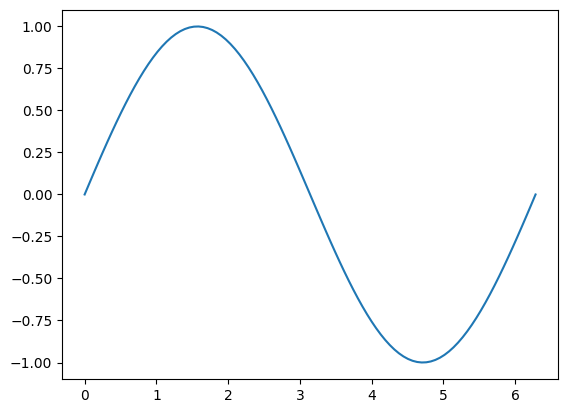

In [106]:
# Now do the same for the y coordinate...
ydata = [0,0.7818,0.9750,0.4339,-0.4339,-0.975,-0.7818, 0]

# the final polynomial should be called
py = lagrange(ydata,cardinals)

# and plot it here ...
plt.plot(t,py)

#Hint: you can re-use the "li" already computed, since the cardinal functions depend only on tdata, not on xdata!

### c) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$.

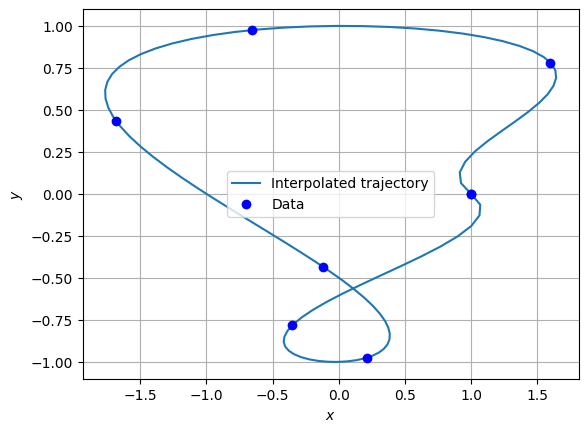

In [107]:

# If your polynomial in x is called px, Create your plot here
plt.plot(px, py, xdata, ydata,'ob')
plt.legend(['Interpolated trajectory', 'Data'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

### d) Find the exact values and compare

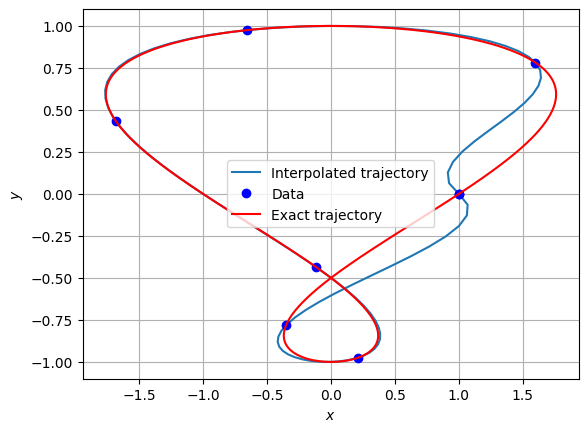

In [138]:
# Compute the exact values

def x(t):
    return np.cos(t)+np.sin(2*t)

def y(t):
    return np.sin(t)

t = np.linspace(tdata[0],tdata[-1],1000)
xdata_exact = x(t)
ydata_exact = y(t)

# Plot here both trajectories
plt.plot(px, py, xdata, ydata,'ob')
plt.plot(xdata_exact, ydata_exact, "red")
plt.legend(['Interpolated trajectory', 'Data', "Exact trajectory"])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

# The differneces are almost zero some places but some places it is very much off.
# They intersect on all points so if we had more points it would be more accurate probably, idk